In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# CHANGE ME!
FILE_PATH = C:\Users\karad\Desktop\ENDG 319\CUREF22\CURE_DELIVERABLE_4\seeds_dataset.xlsx
seeds_dataset = pd.read_excel(r'FILE_PATH')
seeds_dataset

,Area,Perimetre,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Seed Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [2]:
#Separating attributes and targets/classes
tester = seeds_dataset.iloc[0, 0:7]
seeds_dataset = seeds_dataset.iloc[1:210, :]
seeds = seeds_dataset.drop (columns = ['Seed Type'])
name = seeds_dataset.iloc[:, 7]
tester

Area                       15.260
Perimetre                  14.840
Compactness                 0.871
Length of Kernel            5.763
Width of Kernel             3.312
Asymmetry Coefficient       2.221
Length of Kernel Groove     5.220
Name: 0, dtype: float64

In [3]:
#Splitting into training and test sets
from sklearn.model_selection import train_test_split
seeds_train, seeds_test, name_train, name_test = train_test_split(seeds, name)
seeds_train, seeds_test, name_train, name_test;

In [4]:
#Data Preprocessing
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
label

LabelEncoder()

In [5]:
lable = label.fit(name_train)
lable.classes_

ytrain = label.transform(name_train)
name_train, ytrain

(143    3
 46     1
 133    2
 71     2
 17     1
       ..
 124    2
 145    3
 200    3
 82     2
 172    3
 Name: Seed Type, Length: 156, dtype: int64,
 array([2, 0, 1, 1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0,
        1, 2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1,
        0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 0,
        1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2,
        0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2,
        2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2,
        0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2,
        1, 2], dtype=int64))

In [6]:
#PreProcessing with MinMaxScaler()
seeds_train.to_numpy()

array([[12.22  , 13.32  ,  0.8652, ...,  2.967 ,  5.469 ,  5.221 ],
       [15.36  , 14.76  ,  0.8861, ...,  3.393 ,  1.367 ,  5.132 ],
       [16.16  , 15.33  ,  0.8644, ...,  3.395 ,  4.266 ,  5.795 ],
       ...,
       [12.38  , 13.44  ,  0.8609, ...,  2.989 ,  5.472 ,  5.045 ],
       [20.2   , 16.89  ,  0.8894, ...,  3.864 ,  5.173 ,  6.187 ],
       [11.27  , 12.97  ,  0.8419, ...,  2.763 ,  4.309 ,  5.    ]])

In [7]:
#Creating an array with normalized attribute values
train1 = preprocessing.MinMaxScaler()
train1 = train1.fit(seeds_train.to_numpy())
xtrain = train1.transform (seeds_train.to_numpy())
xtrain

array([[0.14176245, 0.16094421, 0.51771117, ..., 0.24019957, 0.61161893,
        0.34564254],
       [0.44252874, 0.46995708, 0.7075386 , ..., 0.54383464, 0.07826132,
        0.30182176],
       [0.51915709, 0.59227468, 0.51044505, ..., 0.54526016, 0.4552003 ,
        0.62826194],
       ...,
       [0.15708812, 0.18669528, 0.47865577, ..., 0.25588026, 0.612009  ,
        0.25898572],
       [0.90613027, 0.92703863, 0.73751135, ..., 0.87954383, 0.57313188,
        0.82127031],
       [0.05076628, 0.08583691, 0.30608538, ..., 0.09479686, 0.46079132,
        0.23682915]])

In [8]:
xtrain.shape

(156, 7)

In [9]:
#Importing the classifier knn from the neighbours module and defining

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier (n_neighbors = 1)
knn = knn.fit(xtrain, ytrain)
knn

KNeighborsClassifier(n_neighbors=1)

In [10]:
#Evaluation of model with test sets
ytest = label.transform(name_test.to_numpy())
name_test, ytest

(90     2
 28     1
 34     1
 6      1
 144    3
 41     1
 44     1
 60     1
 196    3
 7      1
 114    2
 14     1
 126    2
 138    2
 183    3
 189    3
 9      1
 51     1
 125    2
 10     1
 78     2
 142    3
 134    2
 62     1
 5      1
 13     1
 68     1
 64     1
 103    2
 185    3
 39     1
 128    2
 105    2
 111    2
 184    3
 136    2
 148    3
 21     1
 109    2
 130    2
 27     1
 123    2
 122    2
 98     2
 19     1
 33     1
 107    2
 129    2
 162    3
 89     2
 57     1
 157    3
 2      1
 Name: Seed Type, dtype: int64,
 array([1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 2,
        1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 2, 1, 0, 2, 0], dtype=int64))

In [11]:
xtest = train1.transform(seeds_test.to_numpy())
seeds_test, xtest

(      Area  Perimetre  Compactness  Length of Kernel  Width of Kernel  \
 90   20.10      16.99       0.8746             6.581            3.785   
 28   14.11      14.18       0.8820             5.541            3.221   
 34   15.05      14.68       0.8779             5.712            3.328   
 6    14.69      14.49       0.8799             5.563            3.259   
 144  11.82      13.40       0.8274             5.314            2.777   
 41   13.50      13.85       0.8852             5.351            3.158   
 44   15.11      14.54       0.8986             5.579            3.462   
 60   11.42      12.86       0.8683             5.008            2.850   
 196  12.79      13.53       0.8786             5.224            3.054   
 7    14.11      14.10       0.8911             5.420            3.302   
 114  20.97      17.25       0.8859             6.563            3.991   
 14   13.74      14.05       0.8744             5.482            3.114   
 126  18.65      16.41       0.8698   

In [12]:
#Application of model
knn.predict(xtest)

array([1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 1, 0, 2, 0], dtype=int64)

In [13]:
ytest

array([1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 2, 1, 0, 2, 0], dtype=int64)

In [14]:
#Calculating model accuracy using 'score' method
knn.score(xtest, ytest)

0.9622641509433962

In [15]:
knn.score(xtrain, ytrain)

1.0

In [47]:
compare = pd.DataFrame()

for i in range (len(xtrain)):
    knn = KNeighborsClassifier (n_neighbors = (i+1))
    knn = knn.fit(xtrain, ytrain)
    ytest = label.transform(name_test.to_numpy())
    xtest = train1.transform(seeds_test.to_numpy())
    print( (i+1), 'test score is: ', knn.score(xtest, ytest), 'and train score is: ', knn.score(xtrain, ytrain))
    
    if i==0:
        compare = pd.DataFrame({'test score': [knn.score(xtest, ytest)], 'train score': [knn.score(xtrain, ytrain)], 'k value': [(i +1)]})

    newrow = pd.DataFrame({'test score': [knn.score(xtest, ytest)], 'train score': [knn.score(xtrain, ytrain)], 'k value': [(i +1)]})
    compare = pd.concat([compare, newrow], ignore_index=True)

1 test score is:  0.9433962264150944 and train score is:  1.0
2 test score is:  0.9245283018867925 and train score is:  0.967948717948718
3 test score is:  0.8867924528301887 and train score is:  0.967948717948718
4 test score is:  0.9056603773584906 and train score is:  0.9615384615384616
5 test score is:  0.9056603773584906 and train score is:  0.9423076923076923
6 test score is:  0.9245283018867925 and train score is:  0.9487179487179487
7 test score is:  0.8867924528301887 and train score is:  0.9358974358974359
8 test score is:  0.9056603773584906 and train score is:  0.9230769230769231
9 test score is:  0.9056603773584906 and train score is:  0.9358974358974359
10 test score is:  0.9056603773584906 and train score is:  0.9230769230769231
11 test score is:  0.9056603773584906 and train score is:  0.9166666666666666
12 test score is:  0.9056603773584906 and train score is:  0.9102564102564102
13 test score is:  0.9056603773584906 and train score is:  0.9166666666666666
14 test scor

107 test score is:  0.8301886792452831 and train score is:  0.8589743589743589
108 test score is:  0.8301886792452831 and train score is:  0.8589743589743589
109 test score is:  0.8301886792452831 and train score is:  0.8589743589743589
110 test score is:  0.7924528301886793 and train score is:  0.8525641025641025
111 test score is:  0.7735849056603774 and train score is:  0.8397435897435898
112 test score is:  0.7358490566037735 and train score is:  0.8333333333333334
113 test score is:  0.7169811320754716 and train score is:  0.8141025641025641
114 test score is:  0.7169811320754716 and train score is:  0.8141025641025641
115 test score is:  0.6981132075471698 and train score is:  0.8076923076923077
116 test score is:  0.6981132075471698 and train score is:  0.8076923076923077
117 test score is:  0.6792452830188679 and train score is:  0.8012820512820513
118 test score is:  0.6792452830188679 and train score is:  0.8012820512820513
119 test score is:  0.660377358490566 and train scor

In [48]:
compare.head(40)

,test score,train score,k value
0,0.943396,1.000000,1
1,0.943396,1.000000,1
2,0.924528,0.967949,2
3,0.886792,0.967949,3
4,0.905660,0.961538,4
5,0.905660,0.942308,5
6,0.924528,0.948718,6
7,0.886792,0.935897,7
8,0.905660,0.923077,8
9,0.905660,0.935897,9


Text(63.0, 0.5, 'knn score')

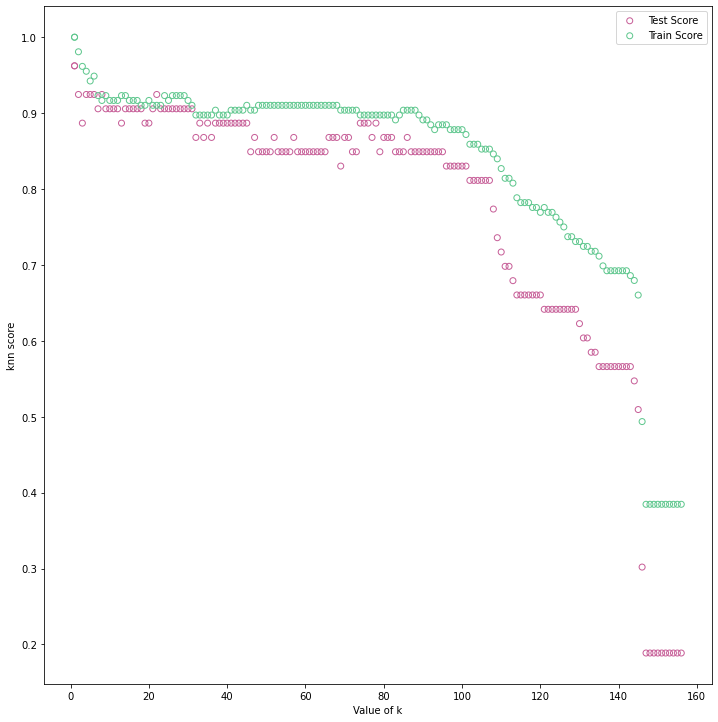

In [18]:
fig, dffig = plt.subplots(figsize = (10,10))

plt.tight_layout()

dffig.scatter (compare.iloc[ : , 2], compare.iloc[: , 0], edgecolor = '#c75f98', fc = 'none', label = 'Test Score')
dffig.scatter (compare.iloc[ : , 2], compare.iloc[: , 1],  edgecolor = '#5fc78e', fc = 'none', label = 'Train Score')
dffig.legend()

dffig.set_xlabel('Value of k')
dffig.set_ylabel('knn score')

In [19]:
#4 test score is:  0.9245283018867925 and train score is:  0.9808917197452229
# k = 4

In [50]:
#Using the StandardScaler()
seeds_train.to_numpy()
train1 = preprocessing.StandardScaler()
train1 = train1.fit(seeds_train.to_numpy())
xtrain = train1.transform (seeds_train.to_numpy())
knn = KNeighborsClassifier (n_neighbors = 1)
knn = knn.fit(xtrain, ytrain)
ytest = label.transform(name_test.to_numpy())
xtest = train1.transform(seeds_test.to_numpy())

compare = pd.DataFrame()

for i in range (len(xtrain)):
    knn = KNeighborsClassifier (n_neighbors = (i+1))
    knn = knn.fit(xtrain, ytrain)
    ytest = label.transform(name_test.to_numpy())
    xtest = train1.transform(seeds_test.to_numpy())
    print( (i+1), 'test score is: ', knn.score(xtest, ytest), 'and train score is: ', knn.score(xtrain, ytrain))
    
    if i==0:
        compare = pd.DataFrame({'test score': [knn.score(xtest, ytest)], 'train score': [knn.score(xtrain, ytrain)], 'k value': [(i +1)]})
    newrow = pd.DataFrame({'test score': [knn.score(xtest, ytest)], 'train score': [knn.score(xtrain, ytrain)], 'k value': [(i +1)]})
    compare = pd.concat([compare, newrow], ignore_index=True)
    

1 test score is:  0.9433962264150944 and train score is:  1.0
2 test score is:  0.9245283018867925 and train score is:  0.967948717948718
3 test score is:  0.8867924528301887 and train score is:  0.967948717948718
4 test score is:  0.9056603773584906 and train score is:  0.9615384615384616
5 test score is:  0.9056603773584906 and train score is:  0.9423076923076923
6 test score is:  0.9245283018867925 and train score is:  0.9487179487179487
7 test score is:  0.8867924528301887 and train score is:  0.9358974358974359
8 test score is:  0.9056603773584906 and train score is:  0.9230769230769231
9 test score is:  0.9056603773584906 and train score is:  0.9358974358974359
10 test score is:  0.9056603773584906 and train score is:  0.9230769230769231
11 test score is:  0.9056603773584906 and train score is:  0.9166666666666666
12 test score is:  0.9056603773584906 and train score is:  0.9102564102564102
13 test score is:  0.9056603773584906 and train score is:  0.9166666666666666
14 test scor

107 test score is:  0.8301886792452831 and train score is:  0.8589743589743589
108 test score is:  0.8301886792452831 and train score is:  0.8589743589743589
109 test score is:  0.8301886792452831 and train score is:  0.8589743589743589
110 test score is:  0.7924528301886793 and train score is:  0.8525641025641025
111 test score is:  0.7735849056603774 and train score is:  0.8397435897435898
112 test score is:  0.7358490566037735 and train score is:  0.8333333333333334
113 test score is:  0.7169811320754716 and train score is:  0.8141025641025641
114 test score is:  0.7169811320754716 and train score is:  0.8141025641025641
115 test score is:  0.6981132075471698 and train score is:  0.8076923076923077
116 test score is:  0.6981132075471698 and train score is:  0.8076923076923077
117 test score is:  0.6792452830188679 and train score is:  0.8012820512820513
118 test score is:  0.6792452830188679 and train score is:  0.8012820512820513
119 test score is:  0.660377358490566 and train scor

In [51]:
compare.head(25)

,test score,train score,k value
0,0.943396,1.000000,1
1,0.943396,1.000000,1
2,0.924528,0.967949,2
3,0.886792,0.967949,3
4,0.905660,0.961538,4
5,0.905660,0.942308,5
6,0.924528,0.948718,6
7,0.886792,0.935897,7
8,0.905660,0.923077,8
9,0.905660,0.935897,9


Text(63.0, 0.5, 'knn score')

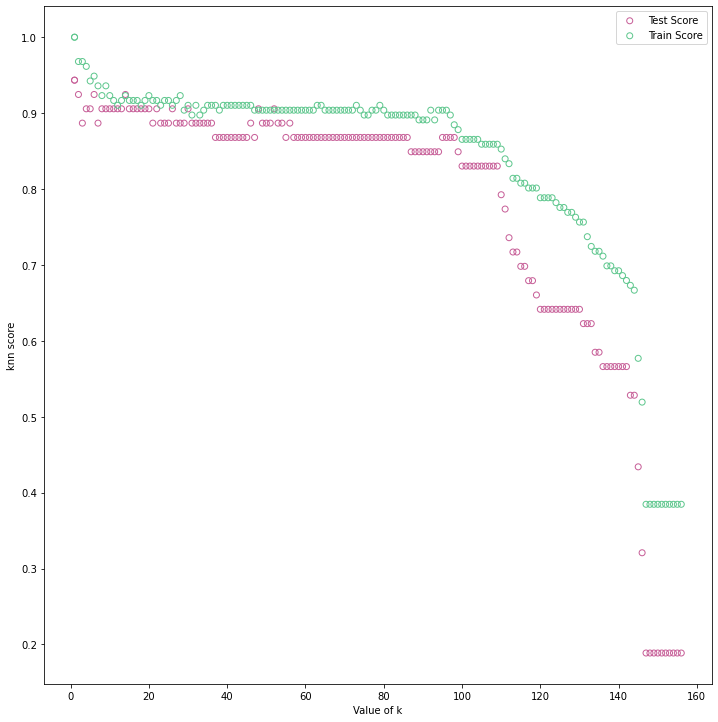

In [22]:
fig, dffig = plt.subplots(figsize = (10,10))

plt.tight_layout()

dffig.scatter (compare.iloc[ : , 2], compare.iloc[: , 0], edgecolor = '#c75f98', fc = 'none', label = 'Test Score')
dffig.scatter (compare.iloc[ : , 2], compare.iloc[: , 1],  edgecolor = '#5fc78e', fc = 'none', label = 'Train Score')
dffig.legend()
dffig.set_xlabel('Value of k')
dffig.set_ylabel('knn score')

In [23]:
# k = 15 with Standard Scaler() is best value by inspection

In [24]:
seeds_train.to_numpy()
train1 = preprocessing.StandardScaler()
train1 = train1.fit(seeds_train.to_numpy())
xtrain = train1.transform (seeds_train.to_numpy())
knn = KNeighborsClassifier (n_neighbors = 15)
knn = knn.fit(xtrain, ytrain)
ytest = label.transform(name_test.to_numpy())
xtest = train1.transform(seeds_test.to_numpy())
knn.score(xtest, ytest), knn.score(xtrain, ytrain)

(0.9056603773584906, 0.9166666666666666)

Confusion matrix, no normalization
[[19  0  4]
 [ 1 19  0]
 [ 0  0 10]]
Normalized confusion matrix
[[0.83 0.   0.17]
 [0.05 0.95 0.  ]
 [0.   0.   1.  ]]


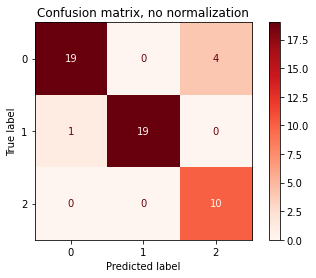

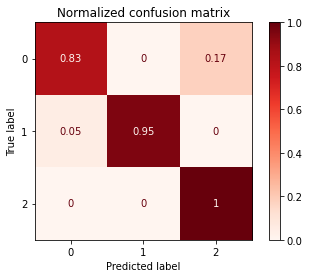

In [25]:

np.set_printoptions(precision=2)

# Plotting confusion matrix
titles_options = [
    ("Confusion matrix, no normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        xtest,
        ytest,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [26]:
#Testing a new data point
newX = np.array([tester])

xnew = train1.transform(newX)
xnew

array([[ 0.2 ,  0.28,  0.06,  0.35,  0.2 , -0.99, -0.37]])

In [27]:
knn.predict(xnew)

array([0], dtype=int64)

In [28]:
label.inverse_transform(knn.predict(xnew))

array([1], dtype=int64)

In [29]:
#Prediction is correct, because 0 = 1, 1 = 2, and 2 = 3 after label encoding